In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("C://Users//VENKAT//Downloads//Restaurant_review//Restaurant_Reviews.tsv",delimiter='\t',quoting=3)


In [2]:
df.head() #it dispaly first 5 rows of data set

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [37]:
df.head(10) #it dispaly first 10 rows

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices
5,Now I am getting angry and I want my damn pho.,0,46,getting angry want damn pho
6,Honeslty it didn't taste THAT fresh.),0,37,Honeslty didnt taste fresh
7,The potatoes were like rubber and you could te...,0,111,potatoes like rubber could tell made ahead tim...
8,The fries were great too.,1,25,fries great
9,A great touch.,1,14,great touch


In [38]:
df.tail()  #it dispaly last rows of data set

,Review,Liked,length,tokenized_Review
995,I think food should have flavor and texture an...,0,66,think food flavor texture lacking
996,Appetite instantly gone.,0,24,Appetite instantly gone
997,Overall I was not impressed and would not go b...,0,50,Overall impressed would go back
998,"The whole experience was underwhelming, and I ...",0,91,whole experience underwhelming think well go N...
999,"Then, as if I hadn't wasted enough of my life ...",0,134,hadnt wasted enough life poured salt wound dra...


In [39]:
df.shape #dataset contains 1000 rows and 2 columns

(1000, 4)

In [40]:
df.info() #it display all the information related to dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review            1000 non-null   object
 1   Liked             1000 non-null   int64 
 2   length            1000 non-null   int64 
 3   tokenized_Review  1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [41]:
df.describe(include="object").T  #dispaly top comment which have hight frequency(repeated more times)

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2
tokenized_Review,1000,991,back,3


In [42]:
df['Liked'].value_counts()  #dispaly count of liked (positive reviews)

1    500
0    500
Name: Liked, dtype: int64

In [43]:
df["Liked"].describe() #discribing statistics related to Liked reviews

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [44]:
df.describe().T  #discribing in table format

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.500,0.500250,0.0,0.0,0.5,1.0,1.0
length,1000.0,58.315,32.360052,11.0,33.0,51.0,80.0,149.0


In [45]:
df['length']=df['Review'].apply(len)  #display length of each review
df.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


In [46]:
df.length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [47]:
df[df['length']==120]['Review'].iloc[0] #dispaly review of certain length whic is 120

'He was extremely rude and really, there are so many other restaurants I would love to dine at during a weekend in Vegas.'

In [48]:
df[df['length']==50]['Review'].iloc[0]  #dispaly review of certain length whic is 50

'I was shocked because no signs indicate cash only.'

In [49]:
df[df['length']==80]['Review'].iloc[0]  #dispaly review of certain length whic is 80

"Today is the second time I've been to their lunch buffet and it was pretty good."

In [3]:
df['length']=df['Review'].apply(len)   #displaying review lengths till 15 reviews
df.head(15)

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
8,The fries were great too.,1,25
9,A great touch.,1,14


In [4]:
import string
from nltk.corpus import stopwords

In [5]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
[punc for punc in string.punctuation]  #dispaly punctuations which will further used for data cleaning purpose

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [7]:
def text_process(msg):    #dispaly reviews without punctuations known as data processing technique
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


In [8]:
df.head()  

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [9]:
df['tokenized_Review'] = df['Review'].apply(text_process)  #tokenizing means grouping the words

In [10]:
df.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


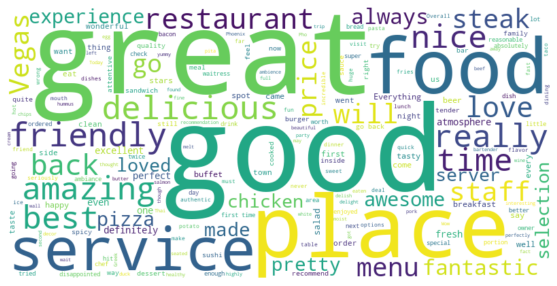

In [11]:
#import library
# diplay positive words
#helpful in displaying the positive words in pictorial from
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = df.loc[df['Liked'] == 1, :]
text = ' '.join([text for text in word_cloud['Review']])

# Generate a WordCloud object without specifying a font path
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

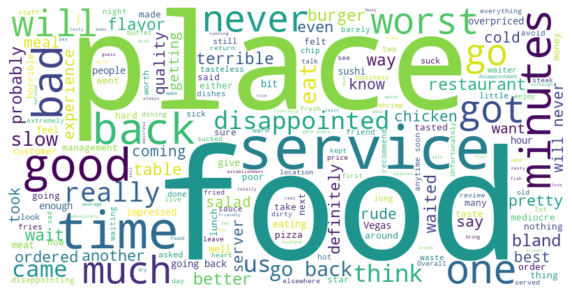

In [12]:
#helpful in displaying the negative words in pictorial from
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = df.loc[df['Liked'] == 0, :]
text = ' '.join([text for text in word_cloud['Review']])

# Generate a WordCloud object without specifying a font path
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X=vectorizer.fit_transform(df['tokenized_Review']).toarray()

In [15]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['tokenized_Review'],df['Liked'],random_state=107,test_size=0.2)

In [17]:
X_train.head()


675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_Review, dtype: object

In [18]:
train_vectorized = vectorizer.transform(X_train)
test_vectorized = vectorizer.transform(X_test)

In [19]:
X_train_array= train_vectorized.toarray()
X_test_array= test_vectorized.toarray()


In [21]:
#Using GaussianNB

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_array ,y_train)

GaussianNB()

In [22]:
y_train_preds_nb = nb.predict(X_train_array)
y_test_preds_nb = nb.predict(X_test_array)

In [23]:
y_test_preds_nb

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1], dtype=int64)

In [24]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
657    1
754    0
839    1
495    0
804    1
Name: Liked, Length: 200, dtype: int64

In [25]:
pd.DataFrame({"actual_y_value":y_test, "predicted_y_value":y_test_preds_nb})

,actual_y_value,predicted_y_value
906,0,0
24,1,0
706,1,1
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,confusion_matrix,classification_report

In [29]:
def print_metrics(actual, predicted):
    print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
    print('precision_score is {}'.format(precision_score(actual, predicted)))
    print('recall_score is {}'.format(recall_score(actual, predicted)))
    print('f1_score is {}'.format(f1_score(actual, predicted)))
    print('confusion_matrix is {}'.format(confusion_matrix(actual, predicted)))
    print('classification_report is {}'.format(classification_report(actual, predicted)))
    

In [30]:
#Evaluation of training model

print_metrics(y_train, y_train_preds_nb)

accuracy_score is 0.76375
precision_score is 0.8403908794788274
recall_score is 0.6482412060301508
f1_score is 0.7319148936170213
confusion_matrix is [[353  49]
 [140 258]]
classification_report is               precision    recall  f1-score   support

           0       0.72      0.88      0.79       402
           1       0.84      0.65      0.73       398

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.78      0.76      0.76       800



In [31]:
#Evaluation of testing model

print_metrics(y_test, y_test_preds_nb)

accuracy_score is 0.725
precision_score is 0.8133333333333334
recall_score is 0.5980392156862745
f1_score is 0.6892655367231638
confusion_matrix is [[84 14]
 [41 61]]
classification_report is               precision    recall  f1-score   support

           0       0.67      0.86      0.75        98
           1       0.81      0.60      0.69       102

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200



In [32]:
#uSING MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnv = MultinomialNB()
mnv.fit(X_train_array ,y_train)

MultinomialNB()

In [33]:
y_train_preds_mnv = mnv.predict(X_train_array)
y_test_preds_mnv = mnv.predict(X_test_array)

In [34]:
y_test_preds_mnv

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1], dtype=int64)

In [35]:
#Evaluation of training model in MultinomialNB
print_metrics(y_train, y_train_preds_mnv)

accuracy_score is 0.77
precision_score is 0.8092485549132948
recall_score is 0.7035175879396985
f1_score is 0.7526881720430108
confusion_matrix is [[336  66]
 [118 280]]
classification_report is               precision    recall  f1-score   support

           0       0.74      0.84      0.79       402
           1       0.81      0.70      0.75       398

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [36]:
#Evaluation of testing model

print_metrics(y_test, y_test_preds_mnv)

accuracy_score is 0.745
precision_score is 0.7802197802197802
recall_score is 0.696078431372549
f1_score is 0.7357512953367875
confusion_matrix is [[78 20]
 [31 71]]
classification_report is               precision    recall  f1-score   support

           0       0.72      0.80      0.75        98
           1       0.78      0.70      0.74       102

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200

